In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pandas.read_excel("precipitation.xlsx")

In [3]:
year = Data['Year'].values
month = Data['Month'].values
day = Data['Day'].values
t_min = Data['T_min'].values
t_max = Data['T_max'].values
t_mean = Data['T_mean'].values
tot_prec = Data['Total precipitation'].values
numbers = Data['No'].values


X = np.zeros((19807,6))
X[:,0] = year[193:20000]
X[:,1] = month[193:20000]
X[:,2] = day[193:20000]
X[:,3] = t_min[193:20000]
X[:,4] = t_mean[193:20000]
X[:,5] = t_max[193:20000]

In [4]:
y = tot_prec[193:20000]

In [5]:
X_test = np.zeros((4683,6))
X_test[:,0] = year[20001:24684]
X_test[:,1] = month[20001:24684]
X_test[:,2] = day[20001:24684]
X_test[:,3] = t_min[20001:24684]
X_test[:,4] = t_mean[20001:24684]
X_test[:,5] = t_max[20001:24684]
y_test = tot_prec[20001:24684]

In [6]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [7]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[ 0.16901038  0.06039965  0.16789581  0.20677102  0.19405037  0.20187277]


In [8]:
##recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[False  True False  True False  True]
[4 1 3 1 2 1]


In [9]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [10]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, y)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 16.6511


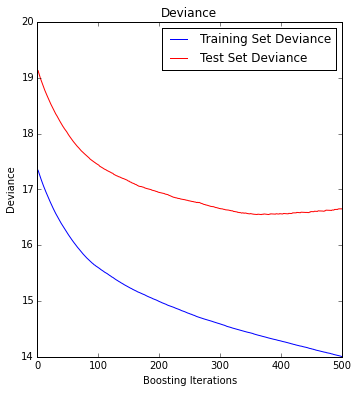

In [11]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

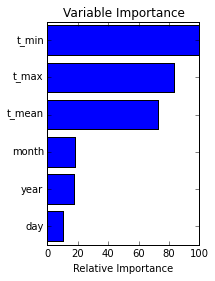

In [12]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
feature_names = np.array( ['year', 'month','day', 't_min','t_mean','t_max'], dtype='|S7')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()